In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("covid_19_india.csv")
# Display first rows
df.head()



,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [30]:

num_cols = ["Cured", "Deaths", "Confirmed"]
df[num_cols].head()


,Cured,Deaths,Confirmed
0,0,0,1
1,0,0,1
2,0,0,2
3,0,0,3
4,0,0,3


In [31]:
stats_summary = pd.DataFrame({
    "Mean": df[num_cols].mean(),
    "Median": df[num_cols].median(),
    "Mode": df[num_cols].mode().iloc[0],
    "Variance": df[num_cols].var(),
    "Std Dev": df[num_cols].std()
})
stats_summary

,Mean,Median,Mode,Variance,Std Dev
Cured,278637.518056,33364.0,0,3.780908e+11,614890.894424
Deaths,4052.402264,588.0,0,1.192262e+08,10919.076411
Confirmed,301031.401822,39773.5,1,4.305313e+11,656148.872965


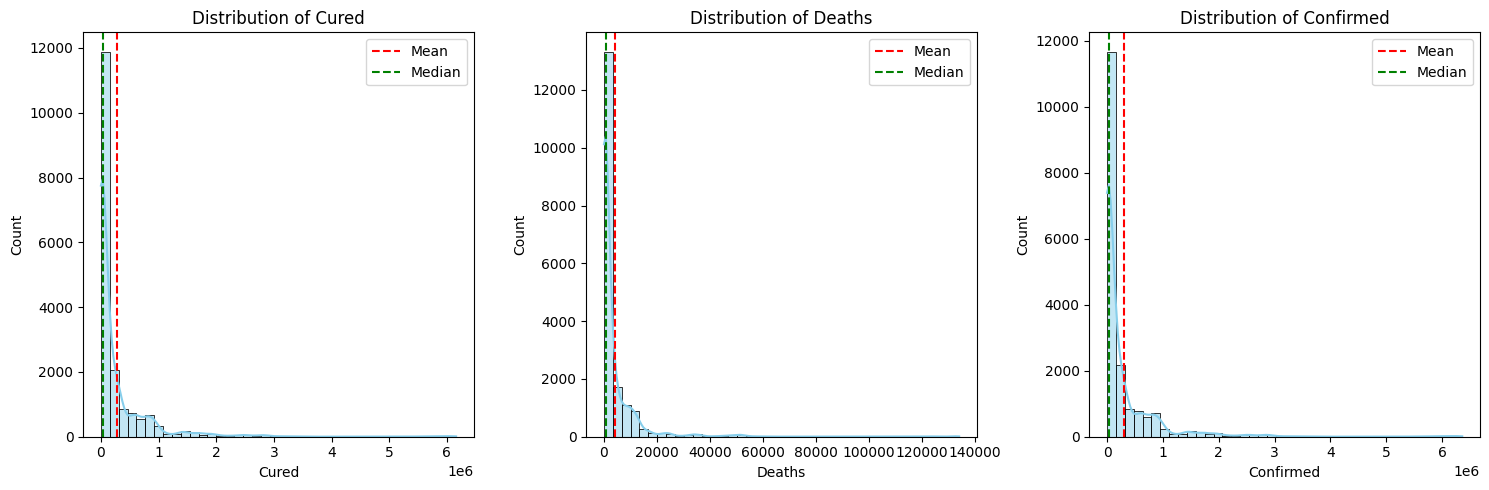

In [32]:
plt.figure(figsize=(15, 5))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], bins=40, kde=True, color="skyblue")
    plt.axvline(df[col].mean(), color='red', linestyle='--', label=f"Mean")
    plt.axvline(df[col].median(), color='green', linestyle='--', label=f"Median")
    plt.title(f"Distribution of {col}")
    plt.legend()
    
plt.tight_layout()
plt.show()

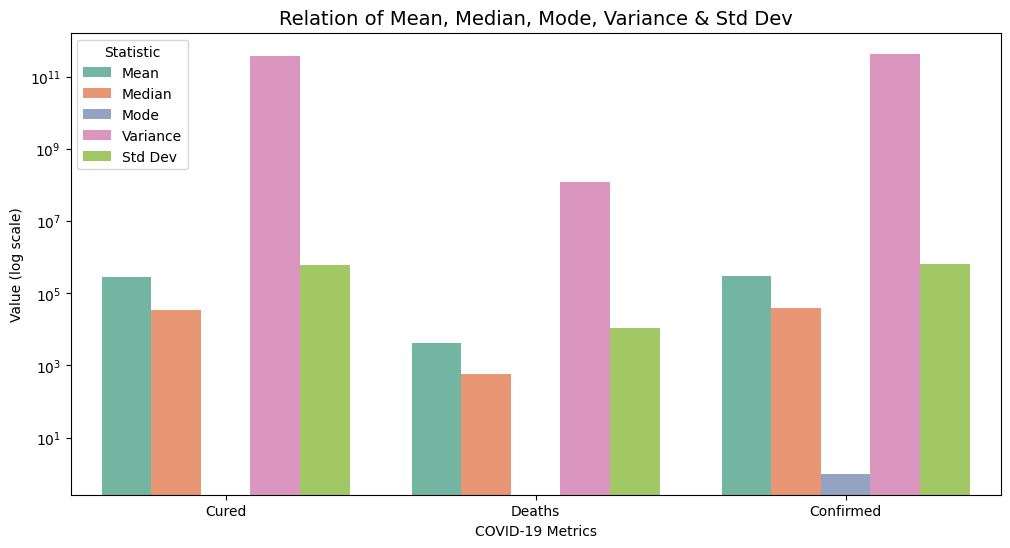

In [33]:
# Reset index for plotting
stats_reset = stats_summary.reset_index().melt(id_vars="index", var_name="Statistic", value_name="Value")
stats_reset.rename(columns={"index": "Category"}, inplace=True)
plt.figure(figsize=(12,6))
sns.barplot(data=stats_reset, x="Category", y="Value", hue="Statistic", palette="Set2")
plt.yscale("log")  # log scale for better view
plt.title("Relation of Mean, Median, Mode, Variance & Std Dev", fontsize=14)
plt.ylabel("Value (log scale)")
plt.xlabel("COVID-19 Metrics")
plt.legend(title="Statistic")
plt.show()